# Data Preprocessing Pipeline

In [10]:
#Imports
import lomb_scargle_extractor as lse
import pandas as pd
import os
import json
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#Job has 256 GB of ram, so hopefully we can just load the entire dataset. 
#In this notebook we play with a subset of the data
os.chdir('/scratch/PI/euan/projects/mhc/data/6mwt_subset/accel_walk_dir')
print("Total size of data is ", end='')
!du -sh .
print("Subset contains filenames with healthcodes:")
os.listdir()

Total size of data is 1.8G	.
Subset contains filenames with healthcodes:


['90c88671-52cc-480c-8549-f501921d0ac4',
 '092a42bf-316a-4da8-9b95-1423ebaf9598',
 '90c747bf-915a-4408-af26-accc3703342c',
 '7d1e16a3-5886-4bc4-aa1a-18a79bc87702',
 'cb24ed70-a078-4777-b4f5-a7832082c6ab',
 '2cc8fb5d-6c75-4782-91de-6bebbfd38c50',
 'bcdcef2e-794a-41af-ae02-5b8854879e75',
 '6aa3f6d0-3b84-48f0-8520-90f2557aab11',
 'bb59f184-01bb-4614-99c4-27c1a06f7c6e',
 'c002df17-8f10-4196-8655-b21216a7698f',
 'da9a7533-44cb-450a-b270-a4a1b4cf836a',
 '6427dce4-77ee-4c2f-b7b0-c93fa3e9244c',
 'a7f6a90f-3a6a-4903-8cad-674b25dab2fe',
 'c371f559-50ba-4595-97ac-0eb714edbe56',
 '67c71978-c0d1-40a9-91ad-784f3a0f9167',
 '873d7a34-8736-4967-a31c-fdcd0eec6d2c',
 'ee621e22-c7c2-45dc-b22d-3a9c59fe6e78',
 'f57af528-01b8-4fa4-b88a-933c87dec473',
 'd5dd1d50-59a5-4a8e-be8d-b4f791141712',
 'f228d32d-b909-4f09-80fa-a314cbf90512',
 '6bb0af0c-907a-486b-badf-637ea066339e',
 '29fe1b38-d9ce-4b0c-a420-794c9ecdeccd',
 'fc6d0104-fa6d-476e-aea0-edca8a0aa752',
 '0d7da3d6-1f72-4d99-b971-761d83023f5e',
 'e3aaacef-d77c-

In [3]:
#In one directory we have records like
print("Records in one healthcode file look like a json:")
os.chdir('/scratch/PI/euan/projects/mhc/data/6mwt_subset/accel_walk_dir/fffca717-aa4a-400c-9c19-02f05451bc88')
os.listdir()
!head -c 2000 2608321.0

Records in one healthcode file look like a json:
[{"y":0.0030975341796875,"timestamp":1363715.735250125,"z":-1.12158203125,"x":-0.2664947509765625},{"y":-0.0093536376953125,"timestamp":1363715.745294125,"z":-1.129806518554688,"x":-0.2764129638671875},{"y":-0.0178680419921875,"timestamp":1363715.755296125,"z":-1.126495361328125,"x":-0.276824951171875},{"y":-0.0369720458984375,"timestamp":1363715.765324125,"z":-1.110000610351562,"x":-0.2528228759765625},{"y":-0.0638427734375,"timestamp":1363715.775344125,"z":-1.094146728515625,"x":-0.262542724609375},{"y":-0.093536376953125,"timestamp":1363715.785365125,"z":-1.06756591796875,"x":-0.2861785888671875},{"y":-0.123687744140625,"timestamp":1363715.795386125,"z":-1.050933837890625,"x":-0.269500732421875},{"y":-0.1796417236328125,"timestamp":1363715.805397125,"z":-1.078506469726562,"x":-0.2138824462890625},{"y":-0.247711181640625,"timestamp":1363715.815431125,"z":-1.151824951171875,"x":-0.1959381103515625},{"y":-0.2959136962890625,"timestamp":1

In [6]:
#Load in data and get ready for LSE
with open('2608321.0', 'r') as file:
    data = json.load(file)
    
print("A single data point looks like:")
print(data[0])
df = pd.DataFrame(columns=['timestamp','x','y','z'])
#df = pd.DataFrame(columns=['y', 'timestamp','z', 'x'])
for row in data:
    df = df.append(pd.Series(row), ignore_index=True)
    
    
    #temp  = pd.DataFrame([row], columns=row.keys())
    #df = pd.concat([df, temp], axis =0).reset_index(drop=True)

#Conform to api - reindex, add mag column, and rename
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
temp_idx = pd.DatetimeIndex(df['timestamp'])
df = df.drop('timestamp', axis = 1)
norm = np.sqrt(np.square(df).sum(axis=1))
df = pd.concat([df, norm], axis=1)
df = df.rename(index=str, columns={'x': 'a_x', 'y': 'a_y', 'z': 'a_z', 0: 'a_mag'})
df = df.set_index(temp_idx)
print("Now the dataframe looks like:")
df

{'y': 0.0030975341796875, 'timestamp': 1363715.735250125, 'z': -1.12158203125, 'x': -0.2664947509765625}


/scratch/users/danjwu/miniconda3/lib/python3.6/site-packages/lomb_scargle_extractor-0.1.1-py3.6.egg/lomb_scargle_extractor/wce/extractor.py:91: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


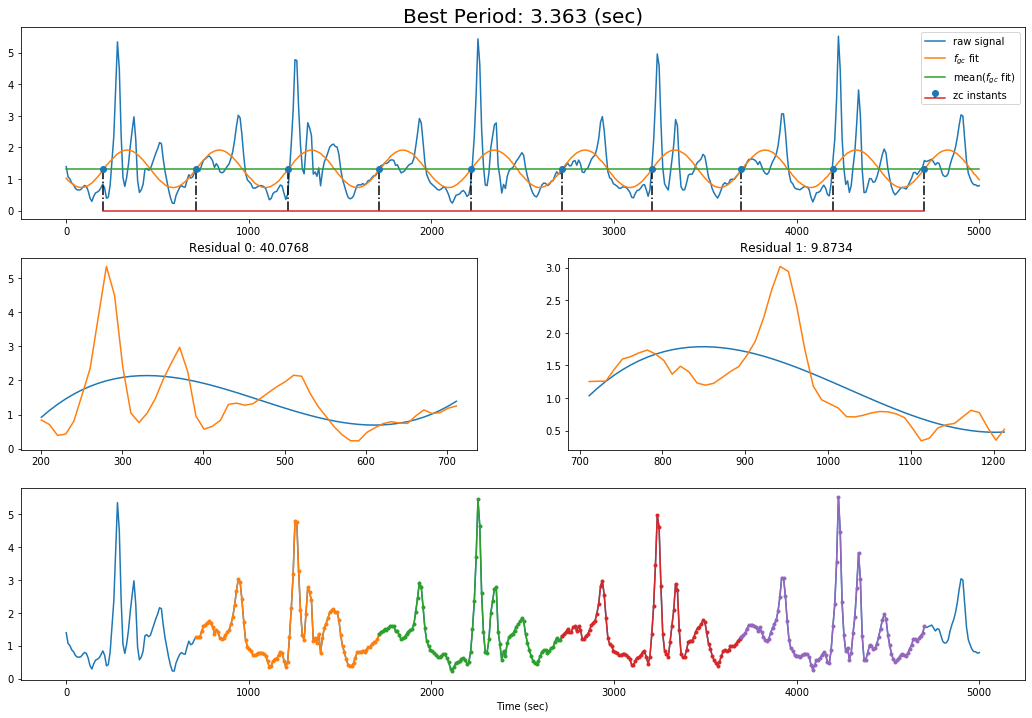

Plotting LSE Extraction


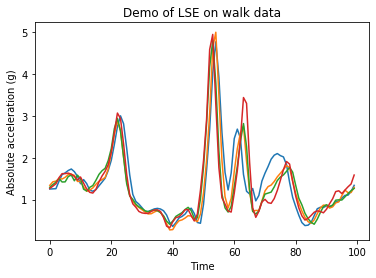

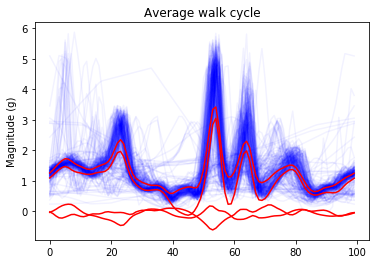

In [22]:
#Extract using lomb scargle peridogram
data = df[2000:2500]
test_cycle = lse.extract(data, plot_vis=True)
if(isinstance(test_cycle, pd.DataFrame)):
    print("Plotting LSE Extraction")
    test_cycle = np.reshape(list(test_cycle['a_mag']), (100, -1), order='F')
    
    plt.figure()
    plt.plot(test_cycle)
    plt.title('Demo of LSE on walk data')
    plt.xlabel('Time')
    plt.ylabel('Absolute acceleration (g)')
else:
    print("No windows found")
    

#Make full windows and plot summary
chunk_size = 500
cycles = np.empty((0, 100, 4))
mag_cycles = np.empty((0, 100))
for idx in range(0, df.shape[0], chunk_size):

    data = df[idx: idx+chunk_size]
    
    try:
        test_cycle = lse.extract(data)
    except:
        continue
    
    if(isinstance(test_cycle, pd.DataFrame)):
        mag_cycle = np.reshape(list(test_cycle['a_mag']), (100, -1), order='F').T
        x_cycle = np.reshape(list(test_cycle['a_x']), (100, -1), order='F').T
        y_cycle = np.reshape(list(test_cycle['a_y']), (100, -1), order='F').T
        z_cycle = np.reshape(list(test_cycle['a_z']), (100, -1), order='F').T
        all_cycle = np.stack([x_cycle, y_cycle, z_cycle, mag_cycle], -1)

        #Store it into the containers
        mag_cycles = np.vstack((mag_cycles, mag_cycle))
        cycles = np.vstack((cycles, all_cycle))

#Plot the cycles
plt.figure(2)
for row in mag_cycles:
    plt.plot(row, 'b', alpha = 0.05)
    
plt.title('Average walk cycle magnit')
plt.ylabel('Magnitude (g)')
mean_cycle = np.mean(mag_cycles, axis = 0)
plt.plot(mean_cycle, 'r')
plt.show()

In [24]:
cycles.shape

(245, 100, 4)